### Raw NN
[https://towardsdatascience.com/how-to-build-your-own-neural-network-from-scratch-in-python-68998a08e4f6](https://towardsdatascience.com/how-to-build-your-own-neural-network-from-scratch-in-python-68998a08e4f6)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
from exit import NeuralNetwork
from exit.layers import Dense
from exit.initializers import GlorotUniform, GlorotNormal
from exit.activations import Sigmoid, Relu
from exit.losses import CrossEntropy, L2
from exit.optimizers import Momentum, RMSProp, Adam, GradientDescent

### Regression

In [85]:
nn = NeuralNetwork()
input = np.linspace(0,20,21).reshape(-1,1)
output = (input*2+10)
nn.sequence(
    input.shape[1],
    Dense(4, Relu),
    Dense(1),
)
for i in range(100):
    predict = nn.train(input, output, L2, learning_rate=0.003)
    if i%99 is 0:
        print(f'loss {i} :', predict['loss'])

loss 0 : 955.2196606797413
loss 99 : 2.5093009248706814e-09


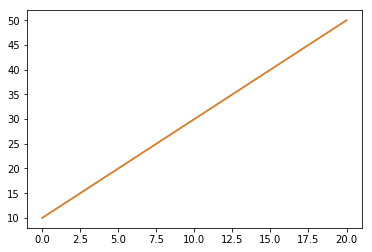

In [86]:
plt.plot(input, output)
plt.plot(input, nn.predict(input))

loss 0 : 19957534.455984425
loss 99 : 396307.7317740619
loss 198 : 362397.2857264184
loss 297 : 328410.16853084345
loss 396 : 294166.19973378
loss 495 : 259806.74947375566
loss 594 : 225682.67344142552
loss 693 : 192106.39973620104
loss 792 : 160081.9949787516
loss 891 : 130167.7758603438
loss 990 : 103896.80837476718


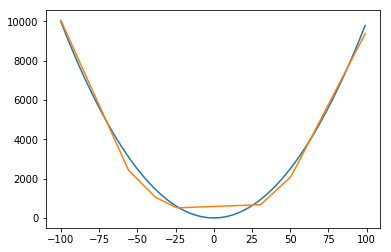

In [82]:
nn = NeuralNetwork(optimizer=Adam(), initializer=GlorotUniform())

input = np.arange(-100,100).reshape(-1, 1)
output = np.power(input, 2) - 5

nn.sequence(
    input.shape[1],
    Dense(6, Relu),
    Dense(1),
)
for i in range(1000):
    predict = nn.train(input, output, L2, learning_rate=100)
    if i%99 is 0:
        print(f'loss {i} :', predict['loss'])

plt.plot(input, output)
plt.plot(input, nn.predict(input))

array([[ 5.31330487, -1.88651092, -1.92384925,  1.93558904,  1.82796482,
        -5.21085825]])

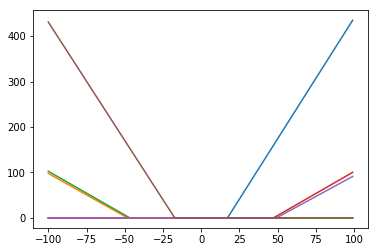

In [6]:
for i in range(6): 
    w = nn._network[0]._weights[0, i]
    b = nn._network[0]._bias[0, i]
    z = np.dot(input, w) + b
    a = nn._network[0]._activation_function.feed_forward(z)
    plt.plot(input, a)
nn._network[0]._weights

### Classifiaction

In [7]:
nn = NeuralNetwork()
input = np.linspace(0,20,100).reshape(-1,1)
output = (input*2+10 > 30).astype(int)
nn.sequence(
    input.shape[1],
    Dense(1, Sigmoid),
)
for i in range(1000):
    predict = nn.train(input, output, CrossEntropy, learning_rate=0.01)
    if i%99 is 0:
        print(f'loss: {i} = ', predict['loss'])

loss: 0 =  1.058958694215737
loss: 99 =  0.8012279534512219
loss: 198 =  0.35349104729357483
loss: 297 =  0.2649253702656075
loss: 396 =  0.446626410186133
loss: 495 =  0.15505315705540734
loss: 594 =  0.169633651747438
loss: 693 =  0.08246722175373143
loss: 792 =  0.06817172206538474
loss: 891 =  0.04358020245336018
loss: 990 =  0.03495505377274563


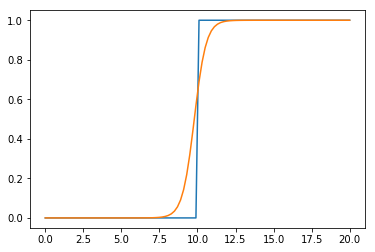

In [8]:
plt.plot(input, output)
plt.plot(input, nn.predict(input))

In [9]:
x = np.random.randn(100000)*2 + 10
mean = np.mean(x)
sd = np.sqrt(np.sum( np.square(x-mean) ) / (x.shape[0]-1)  )
sd, mean

(2.001299760573178, 9.994964414615657)

In [80]:
np.sum([[1,2], [3,4]], 0)

array([4, 6])